# **Background**

An autoencoder is a neural network that takes an input, encodes it into a lower-dimensional latent space through "encoding" layers, and then attempts to reconstruct the original input using "decoding" layers. Autoencoders are often used for dimensionality reduction.

# **Task:**

Train a 64x16x64 autoencoder on the digits dataset.



In [15]:
# uploading nn.py

from google.colab import files
uploaded = files.upload()

Saving nn.py to nn.py


In [16]:
# imports

from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from nn import NeuralNetwork

# Loading digits datasets using `sklearn.datasets.load_digits()`

In [17]:
digits = load_digits()

X = digits.data
y = digits.target

# Split data into training and validation

In [23]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
np.random.seed(888)

indices = np.arange(n_samples)
np.random.shuffle(indices)

train_size = int(0.8 * n_samples)
X_train, X_test = data[indices[:train_size]], data[indices[train_size:]]
y_train, y_test = digits.target[indices[:train_size]], digits.target[indices[train_size:]]

# Generate instance of `NeuralNetwork` class


In [63]:
nn_architecture = [
    {'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},  # Input -> Hidden layer (64 -> 16)
    {'input_dim': 16, 'output_dim': 64, 'activation': 'sigmoid'}  # Hidden -> Output layer (16 -> 64)
]

learning_rate = 1e-5
random_seed = 8
batch_size = 1000
epochs = 4000
loss_function = 'mean_squared_error'

network = NeuralNetwork(nn_architecture, learning_rate, random_seed, batch_size, epochs, loss_function)

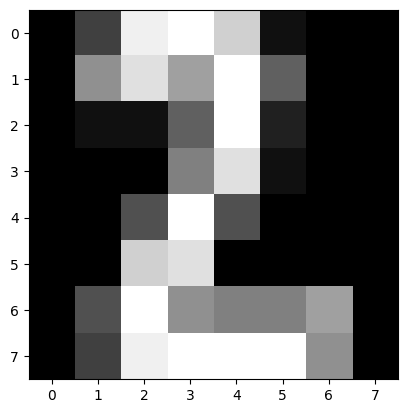

[[ 0.  4. 15. 16. 13.  1.  0.  0.]
 [ 0.  9. 14. 10. 16.  6.  0.  0.]
 [ 0.  1.  1.  6. 16.  2.  0.  0.]
 [ 0.  0.  0.  8. 14.  1.  0.  0.]
 [ 0.  0.  5. 16.  5.  0.  0.  0.]
 [ 0.  0. 13. 14.  0.  0.  0.  0.]
 [ 0.  5. 16.  9.  8.  8. 10.  0.]
 [ 0.  4. 15. 16. 16. 16.  9.  0.]]


In [20]:
# Visualizing a digit
plt.imshow(X_train[0].reshape(8, 8), cmap="gray")
plt.show()
print(X_train[0].reshape(8, 8))

In [21]:
# Shapes of inputs and labels
print("Shape of training inputs is:", X_train.shape)
print("Shape of training set labels is:", y_train.shape)

print("Shape of test inputs is:", X_test.shape)
print("Shape of test set labels is:", y_test.shape)

Shape of training inputs is: (1437, 64)
Shape of training set labels is: (1437,)
Shape of test inputs is: (360, 64)
Shape of test set labels is: (360,)


# Train your autoencoder on the training data

In [64]:
# Train the autoencoder and capture the losses
per_epoch_loss_train, per_epoch_loss_val = network.fit(X_train, X_train, X_test, X_test)

epoch 0 out of 4000
epoch 100 out of 4000
epoch 200 out of 4000
epoch 300 out of 4000
epoch 400 out of 4000
epoch 500 out of 4000
epoch 600 out of 4000
epoch 700 out of 4000
epoch 800 out of 4000
epoch 900 out of 4000
epoch 1000 out of 4000
epoch 1100 out of 4000
epoch 1200 out of 4000
epoch 1300 out of 4000
epoch 1400 out of 4000
epoch 1500 out of 4000
epoch 1600 out of 4000
epoch 1700 out of 4000
epoch 1800 out of 4000
epoch 1900 out of 4000
epoch 2000 out of 4000
epoch 2100 out of 4000
epoch 2200 out of 4000
epoch 2300 out of 4000
epoch 2400 out of 4000
epoch 2500 out of 4000
epoch 2600 out of 4000
epoch 2700 out of 4000
epoch 2800 out of 4000
epoch 2900 out of 4000
epoch 3000 out of 4000
epoch 3100 out of 4000
epoch 3200 out of 4000
epoch 3300 out of 4000
epoch 3400 out of 4000
epoch 3500 out of 4000
epoch 3600 out of 4000
epoch 3700 out of 4000
epoch 3800 out of 4000
epoch 3900 out of 4000


# Plot your training and validation loss by epoch


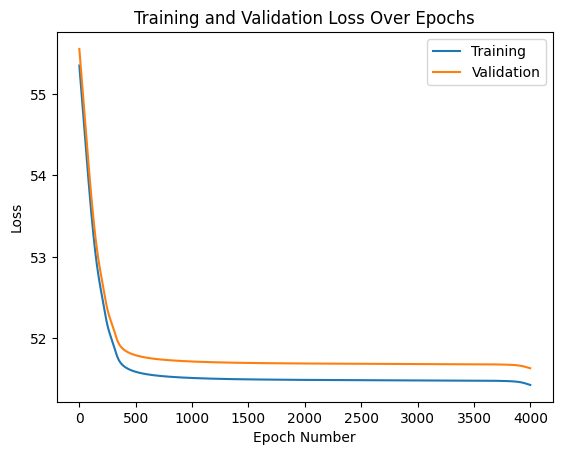

In [65]:
# Plotting
plt.plot(per_epoch_loss_train, label = 'Training')
plt.plot(per_epoch_loss_val, label = 'Validation')


plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.show()

# Quantify average reconstruction error & explain chosen hyperparameter values

In [67]:
reconstruction_error = np.mean(per_epoch_loss_val)
reconstruction_error

51.83725587705902

Explaining chosen hyperparameter values:

I tried several combinations of hyperparameters, adjusting the learning rate, batch size, and epochs. Overall, the final ones chosen were learning rate = 1e-5, batch size = 1000, and epochs = 4000. Any adjustment beyond these values did not affect the reconstruction error value much.
